In [1]:
# run the header that sets up the environment

already_run = globals().get("already_run", False)
if not (already_run):
    print("Running the header")
    already_run = True
    %run header.ipynb

    load_packages()
    change_wordir()
    colors, colours = colourblind_palette()

model = "cyclic_2021"
model = "new_PSI"
model = "latest_dev"

m = load_model(model)

Running the header


Could not find cannot import name 'dopri5' from 'assimulo.lib' (c:\Users\andre\miniconda3\envs\modelbase.1.30.0\lib\site-packages\assimulo\lib\__init__.py)
Could not find cannot import name 'rodas' from 'assimulo.lib' (c:\Users\andre\miniconda3\envs\modelbase.1.30.0\lib\site-packages\assimulo\lib\__init__.py)
Could not find cannot import name 'odassl' from 'assimulo.lib' (c:\Users\andre\miniconda3\envs\modelbase.1.30.0\lib\site-packages\assimulo\lib\__init__.py)
Could not find ODEPACK functions.
Could not find RADAR5
Could not find GLIMDA.


1.30.0

succesfully loaded latest_dev :D


# Model

In [2]:
stoichio_subset = m.get_stoichiometric_df()
stoichio_subset = stoichio_subset.loc[["B0", "B1", "B2", "PQ"],:]

#stoichio_subset.loc[(stoichio_subset != 0).any(axis = 1)]
stoichio_subset.loc[:, (stoichio_subset != 0).any(axis = 0)] # checks in each column, but I want to check in each row


,vB01,vB10F,vB10Q,vB12,vB20,vB23,vB32F,vB32Q,vB6f,vCyc,vNDH,vPTOX
B0,-1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B1,1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B2,0.0,0.0,0.0,1.0,-1.0,-1.0,1.0,1.0,0.0,0.0,0.0,0.0
PQ,0.0,0.0,0.0,0.0,-0.5,0.0,0.0,0.0,1.0,-1.0,-1.0,1.0


In [3]:
#m.get_algebraic_module("P700+FA_alm")
print(m.get_algebraic_module("fluorescence_alm"))
#m.get_algebraic_module("rel_P700+FA_alm")

fluorescence(Q, B0, B2, ps2cs, k2, kF, kH_factor, kH0) -> ['Fluo']


In [3]:
#m.get_compound_stoichiometry("PC")
m.get_compound_stoichiometry("PQ")

{'vPTOX': 1, 'vNDH': -1, 'vB6f': 1, 'vCyc': -1, 'vB20': -0.5}

In [6]:
#m.get_parameter("k1")
m.get_parameter("kH_factor")

5000000000.0

In [5]:
#m.get_rate_args("v2_to_P700FA-")
m.get_rate_args("vB32Q")

['B3', 'Q', 'kH_factor', 'kH0']

In [6]:
#m.get_rate_function("v2_to_P700FA-")(1,2,3,4,5,6)
m.get_rate_function("vB32Q")(1,0,1,2)

2

In [4]:
m.check_unused_compounds()

set()

In [5]:
m.check_missing_parameters()

set()

In [6]:
set(m.check_unused_parameters())- {'APX0','ATPcyt','CN','Ca','Ctot','E0_cytf','Keq_cyc','Km161','Km162','Kmnadph','NADPHcyt','bH','dT','k1','k1APX','k1rev','k2APX',
                                    'k3APX','k4','k4APX','k5','k5APX','k6','k7','k8','kATPcons','kActATPase','kDeactATPase','kNADPHcons','kNh','kNr','kProtonation','kdeg','krep','nH','pHmedium','prob_attach'}

set()

# Simulator

In [7]:
y0 = {
    "PQ": 11.027139850905353,"PC": 1.8895071932002812,"Fd": 3.8690237263896705,"ATP": 1.620195002854852,"NADPH": 0.4882103700673736,"H": 0.0022147075094596015,
    "LHC": 0.8023074419510501,"Psbs": 0.9607146039898598,"Vx": 0.950783616933656,"PGA": 0.9913970817549008,"BPGA": 0.0005355311557548053,"GAP": 0.0062630116252017295,
    "DHAP": 0.13778623933075737,"FBP": 0.006126990841013743,"F6P": 0.31166103888161867,"G6P": 0.7168203893211117,"G1P": 0.041575582577936025,"SBP": 0.01311315151803723,
    "S7P": 0.15782894767619207,"E4P": 0.00732079113061801,"X5P": 0.022396849486562384,"R5P": 0.03751472214765548,"RUBP": 0.13153657267999222,"RU5P": 0.015005888732707041,
    "MDA": 5.85270097771621e-06,"ASC": 9.999994138785292,"H2O2": 3.4273920330125316e-06,"DHA": 8.513863740903352e-09,"GSH": 9.999999991725186,"GSSG": 4.137406632226743e-09,
    "TR_ox": 0.9,"E_inactive": 4.7368421052631575,
    "P700FA": 1.4731,            #eq at pfd 800       #"PSItot": 2.5, (in parameter vector of Matuszynska)
    "P700+FA-": 0.0131,
    "P700FA-": 0.0177,
    "B0": 1,
    "B1": 0.25,
    "B2": 1
}

In [8]:
s = Simulator(m)
s.initialise(y0)
t_end = 200
steps_per_second = 1

steps = steps_per_second * t_end

pfd = 500
s.update_parameter("pfd", pfd)

_ = s.simulate(t_end = t_end, steps = steps)

(<Figure size 1000x700 with 1 Axes>,
 <Axes: xlabel='Remember to label your axes', ylabel='Remember to label your axes'>)

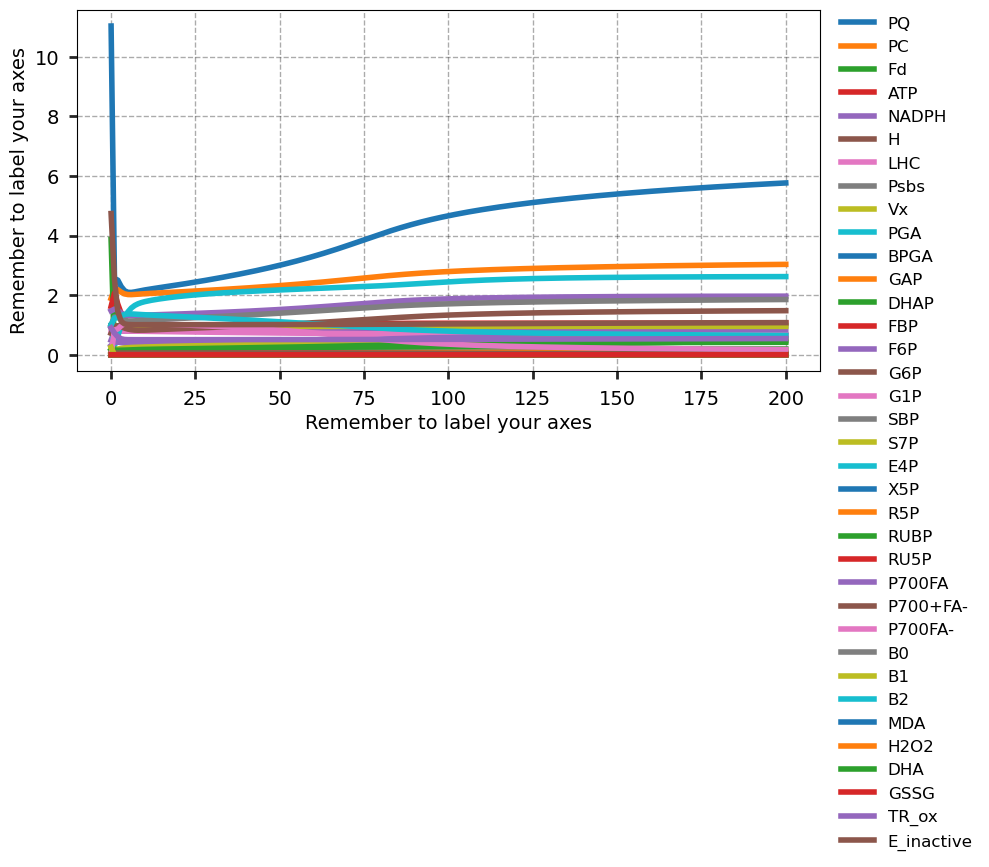

In [9]:
s.plot()

In [9]:
results = s.get_full_results_df()

# check if results are identical

In [ ]:
results

In [ ]:
results2

In [11]:
joblib.dump(results, "result_weird_function.pkl")

['result_weird_function.pkl']

In [9]:
results2 = joblib.load("result_weird_function.pkl")

In [10]:
(results2 == results).all().all()

np.True_